In [1]:
import warnings

warnings.filterwarnings("ignore")

# Introducción a la Estadística Espacial

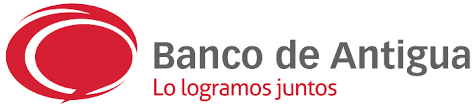

## <font color="#229966">Vamos a trabajar con las bases de comunas y distritos escolares</font>

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from pathlib import Path

DATA_PATH = Path().cwd().parent.absolute() / "data"

mismos crs?: True


<Axes: >

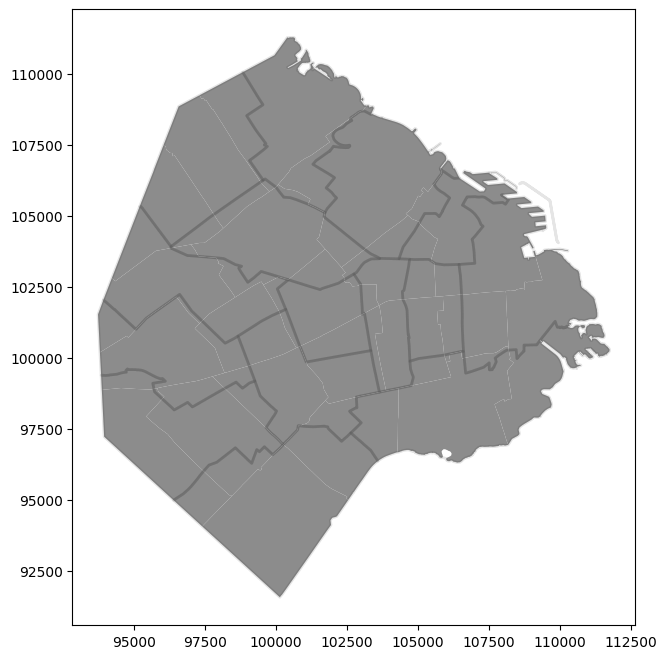

In [4]:
# leer la cartografía de comunas
com = gpd.read_file(DATA_PATH / "comunas/comunas.shp")
com

# leer los datos de distritos escolares
dis = gpd.read_file(DATA_PATH / "schools/distritos_escolares.shp")

# chequear que tengan la misma proyeccion
print("mismos crs?:", dis.crs == com.crs)

# hacer un plot para observar la cartografia
fig, ax = plt.subplots(1, figsize=(8, 8))
dis.plot(
    ax=ax, facecolor="grey", alpha=1
)  # distritos escolares líneas finitas y claritas
com.plot(ax=ax, facecolor="white", edgecolor="black", alpha=0.1, linewidth=2)
# comunas líneas gruesas y oscuras

<Axes: >

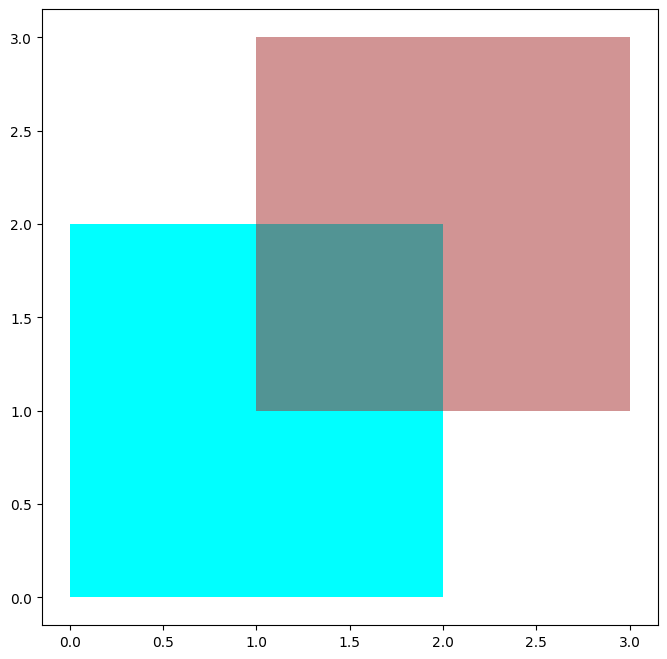

In [5]:
# importamos las funciones de shapely que nos permiten crear y manipular objetos geometricos
from shapely.geometry import Polygon, Point, LineString

polys1 = gpd.GeoSeries([Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])])

polys2 = gpd.GeoSeries([Polygon([(1, 1), (3, 1), (3, 3), (1, 3)])])


A = gpd.GeoDataFrame({"geometry": polys1, "letra": ["A"]})
B = gpd.GeoDataFrame({"geometry": polys2, "letra": ["B"]})

f, ax = plt.subplots(1, figsize=(8, 8))
A.plot(ax=ax, color="cyan")
B.plot(ax=ax, color="brown", alpha=0.5)

In [6]:
A # inspeccionamos el objeto A

,geometry,letra
0,"POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....",A


# <font color="#229966">Realizamos el proceso de union</font>

Unimos ambos geoDataFrames con el método o función overlay, utilizando union como operador geográfico. Qué otros operadores

In [7]:
unido = gpd.overlay(df1=A, df2=B, how="union")
unido

,letra_1,letra_2,geometry
0,A,B,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,A,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
2,NaN,B,"POLYGON ((1.00000 3.00000, 3.00000 3.00000, 3...."


In [8]:
# Producimos una nueva columna donde agregamos los datos de cada una de los dataframes originales
unido.letra_1 = unido.letra_1.fillna(
    ""
)  # Reemplaza todos los valores nulos (NaN) en esa columna con una cadena vacía ''.
unido.letra_2 = unido.letra_2.fillna("")
unido["union"] = unido.letra_1 + unido.letra_2
unido


,letra_1,letra_2,geometry,union
0,A,B,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1....",AB
1,A,,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....",A
2,,B,"POLYGON ((1.00000 3.00000, 3.00000 3.00000, 3....",B


## <font color="#229966">¿Qué otras operaciones con polígonos se pueden hacer?</font>

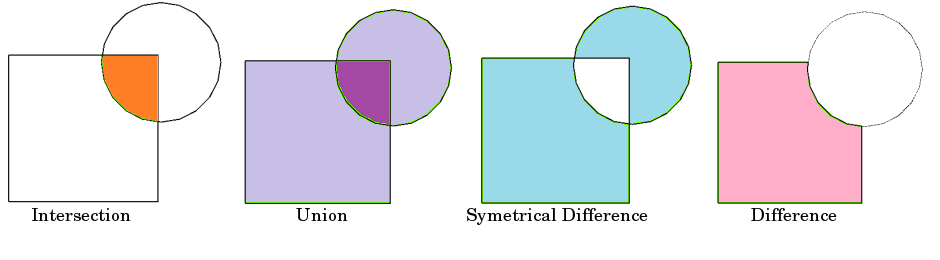

Intersección:
  letra_1 letra_2                                           geometry
0       A       B  POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1....
Diferencia:
                                            geometry letra
0  POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....     A
Diferencia Simétrica:
  letra_1 letra_2                                           geometry
0       A     NaN  POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....
1     NaN       B  POLYGON ((1.00000 3.00000, 3.00000 3.00000, 3....


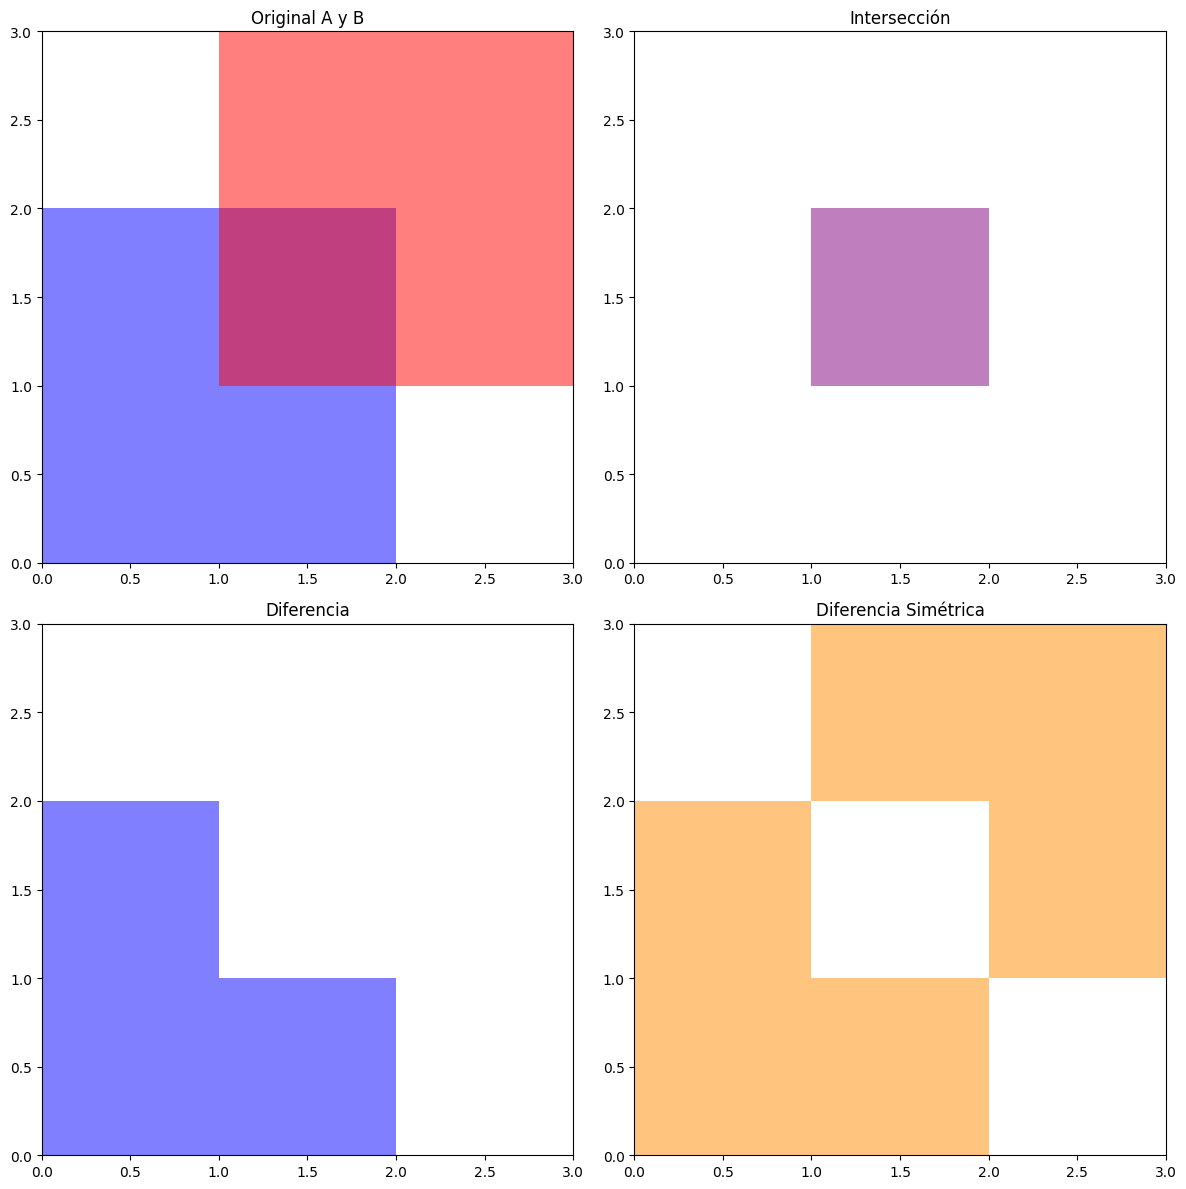

In [9]:
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

# Intersección
intersecado = gpd.overlay(df1=A, df2=B, how="intersection")
print("Intersección:")
print(intersecado)

# Diferencia
diferencia = gpd.overlay(df1=A, df2=B, how="difference")
print("Diferencia:")
print(diferencia)

# Diferencia Simétrica
diferencia_simetrica = gpd.overlay(df1=A, df2=B, how="symmetric_difference")
print("Diferencia Simétrica:")
print(diferencia_simetrica)

# Visualizar los resultados
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Obtener los límites combinados
xmin = min(A.total_bounds[0], B.total_bounds[0])
xmax = max(A.total_bounds[2], B.total_bounds[2])
ymin = min(A.total_bounds[1], B.total_bounds[1])
ymax = max(A.total_bounds[3], B.total_bounds[3])

# Establecer los mismos límites para todos los subplots
for ax in axes.flat:
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# Original A y B
A.plot(ax=axes[0, 0], color="blue", alpha=0.5)
B.plot(ax=axes[0, 0], color="red", alpha=0.5)
axes[0, 0].set_title("Original A y B")

# Intersección
intersecado.plot(ax=axes[0, 1], color="purple", alpha=0.5)
axes[0, 1].set_title("Intersección")

# Diferencia
diferencia.plot(ax=axes[1, 0], color="blue", alpha=0.5)
axes[1, 0].set_title("Diferencia")

# Diferencia Simétrica
diferencia_simetrica.plot(ax=axes[1, 1], color="darkorange", alpha=0.5)
axes[1, 1].set_title("Diferencia Simétrica")

plt.tight_layout()
plt.show()

# <font color="#229966">Ejercicio 1</font>

Con los triángulos definidos a continuación (u otros que te gusten a vos!) realizar la unión y la intersección y mostrarlos!

<Axes: >

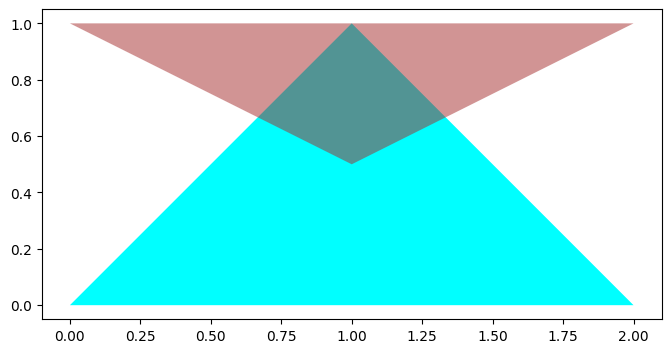

In [10]:
from shapely.geometry import Polygon, Point, LineString

polys1 = gpd.GeoSeries([Polygon([(0, 0), (2, 0), (1, 1)])])

polys2 = gpd.GeoSeries([Polygon([(0, 1), (2, 1), (1, 0.5)])])


A = gpd.GeoDataFrame({"geometry": polys1, "letra": ["T1"]})
B = gpd.GeoDataFrame({"geometry": polys2, "letra": ["T2"]})

f, ax = plt.subplots(1, figsize=(8, 8))
A.plot(ax=ax, color="cyan")
B.plot(ax=ax, color="brown", alpha=0.5)

# <font color="#229966">Datos Reales</font>

In [11]:
# seleccionar columnas de interes, cambiarle los nombres y el formato
com = com.reindex(
    columns=["COMUNAS", "AREA", "geometry"]
)  # reorganizamos las columnas comunas area y geometry en un nuevo dataframe
com.columns = ["COMUNA", "AREA_COMUNA", "geometry"]  # renombramos las columnas a gusto
com.COMUNA = com.COMUNA.map(
    lambda x: str(int(x))
)  # convierte los nombres de las comunas en string
com.head(2)


,COMUNA,AREA_COMUNA,geometry
0,2,6.140873e+06,"POLYGON ((106248.322 106329.927, 106283.690 10..."
1,5,6.660526e+06,"POLYGON ((104625.143 101679.935, 104629.994 10..."


In [12]:
# Buscamos los datos de promedio ponderado de NBI por comuna
nbi = pd.read_csv(DATA_PATH / "nbi_x_comuna.csv")

nbi = nbi.reset_index()
nbi = nbi.rename(columns={"index": "COMUNA"})
nbi.COMUNA = nbi.COMUNA.map(str)
nbi.columns = ["COMUNA", "NBI_prom"]
nbi.head()

,COMUNA,NBI_prom
0,0,15.119460
1,1,4.547143
2,2,2.648427
3,3,2.350097
4,4,3.320962


In [13]:
# pasamos los datos a la cartografía de las comunas y chequear si hay datos faltantes
com = com.merge(nbi, on="COMUNA", how="inner")
com

,COMUNA,AREA_COMUNA,geometry,NBI_prom
0,2,6.140873e+06,"POLYGON ((106248.322 106329.927, 106283.690 10...",2.648427
1,5,6.660526e+06,"POLYGON ((104625.143 101679.935, 104629.994 10...",4.177565
2,6,6.851029e+06,"POLYGON ((102998.760 102464.802, 103002.947 10...",5.408870
3,7,1.242290e+07,"POLYGON ((101036.604 99947.208, 101075.002 998...",5.930856
4,9,1.650531e+07,"POLYGON ((94869.346 99583.645, 94885.072 99583...",13.503061
5,10,1.265656e+07,"POLYGON ((97703.854 101010.270, 97716.104 1009...",6.370736
6,11,1.412004e+07,"POLYGON ((96781.486 103649.395, 96892.479 1035...",3.014483
7,12,1.557093e+07,"POLYGON ((96329.447 103927.833, 96314.729 1039...",10.872825
8,14,1.577250e+07,"POLYGON ((103353.744 108568.622, 103353.843 10...",4.575194
9,3,6.385991e+06,"POLYGON ((104713.283 103467.380, 104862.315 10...",2.350097


In [14]:
# seleccionar y renombrar columnas de los distritos escolares
dis = dis.reindex(columns=["ROMANO", "AREA", "geometry"])
dis.columns = ["DISTRITO", "AREA_DISTRITO", "geometry"]
dis.head()

,DISTRITO,AREA_DISTRITO,geometry
0,II,6.527968e+06,"POLYGON ((105611.166 102698.177, 105618.690 10..."
1,III,4.927409e+06,"POLYGON ((108108.830 102223.802, 108111.635 10..."
2,VI,6.722145e+06,"POLYGON ((105708.729 101262.958, 105715.307 10..."
3,VII,7.237555e+06,"POLYGON ((102410.091 102749.997, 102407.548 10..."
4,VIII,6.311372e+06,"POLYGON ((101903.255 98390.064, 101900.588 983..."


In [15]:
# chequeamos que los geodataframes tengan el mismo sistema de coordenadas

print(
    "los geoDataFrame tienen el mismo sistema de coordenadas?\n Respuesta:",
    com.crs == dis.crs,
)

los geoDataFrame tienen el mismo sistema de coordenadas?
 Respuesta: True


In [16]:
# realizamos la union y observamos los datos

unidas = gpd.overlay(com, dis, how="union")
unidas.head(15)

,COMUNA,AREA_COMUNA,NBI_prom,DISTRITO,AREA_DISTRITO,geometry
0,2,6.140873e+06,2.648427,II,6.527968e+06,"MULTIPOLYGON (((105523.783 103378.966, 105573...."
1,2,6.140873e+06,2.648427,IX,1.703833e+07,"MULTIPOLYGON (((105587.274 106140.404, 105622...."
2,2,6.140873e+06,2.648427,I,1.453768e+07,"POLYGON ((106283.690 106316.731, 106329.275 10..."
3,5,6.660526e+06,4.177565,II,6.527968e+06,"POLYGON ((102914.111 102698.153, 102840.705 10..."
4,5,6.660526e+06,4.177565,VI,6.722145e+06,"POLYGON ((104629.994 101532.700, 104635.643 10..."
5,5,6.660526e+06,4.177565,VII,7.237555e+06,"POLYGON ((103122.596 101570.794, 103051.408 10..."
6,5,6.660526e+06,4.177565,VIII,6.311372e+06,"POLYGON ((103758.572 98810.145, 103649.838 987..."
7,5,6.660526e+06,4.177565,V,1.133738e+07,"MULTIPOLYGON (((104324.354 98925.442, 104328.5..."
8,5,6.660526e+06,4.177565,XIX,9.409782e+06,"MULTIPOLYGON (((104078.296 98876.928, 104096.3..."
9,6,6.851029e+06,5.408870,II,6.527968e+06,"POLYGON ((102396.330 102741.645, 102407.082 10..."


**Notemos que algunas de las geometrías son polygon y otras son myltipolygon**


**Polygon**: Representa una única área cerrada con uno o más anillos (un anillo exterior y opcionalmente uno o más anillos interiores).


**MultiPolygon** Representa una colección de varios polígonos que pueden estar disjuntos.

## <font color="#229966">Caso ejemplo</font>
En el cuadro de arriba podemos ver por ejemplo que el Distrito XIII comparte territorio con 4 Comunas: 7,8,9,10. Veamos otro caso particular como el caso 6.

<Axes: >

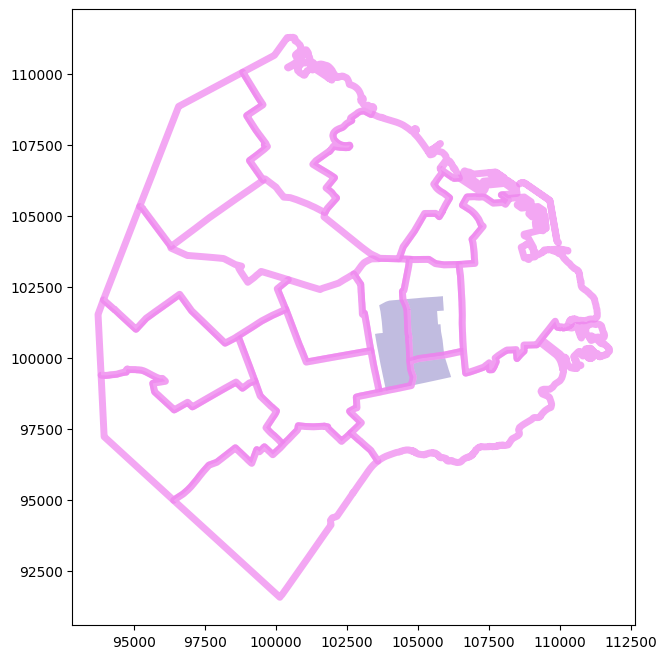

In [17]:
# tomemos un caso de ejemplo el distrito escolar 6
fig, ax = plt.subplots(1, figsize=(8, 8))
dis.loc[dis.DISTRITO == "VI"].plot(ax=ax, facecolor="#332299", alpha=1)
com.plot(ax=ax, facecolor="white", edgecolor="violet", alpha=0.7, linewidth=5)

In [18]:
# creamos un geodataframe del distrito 6
distrito6 = unidas.loc[unidas.DISTRITO == "VI", :].copy()
distrito6

,COMUNA,AREA_COMUNA,NBI_prom,DISTRITO,AREA_DISTRITO,geometry
4,5,6.660526e+06,4.177565,VI,6.722145e+06,"POLYGON ((104629.994 101532.700, 104635.643 10..."
42,3,6.385991e+06,2.350097,VI,6.722145e+06,"POLYGON ((105829.260 100079.184, 105813.088 10..."
50,4,2.170124e+07,3.320962,VI,6.722145e+06,"MULTIPOLYGON (((104795.135 99110.044, 104802.0..."



Observamos que se superpone con las comunas 5, 3 y 4. Vemos atributos de los datasets originales, como el area del distrito y el area de la comuna. También hay una parte del distrito que no se superpone con ninguna comuna. 

In [19]:
# calculamos el area de las unidades espaciales obtenidas
distrito6["area_union"] = distrito6.geometry.area
distrito6

,COMUNA,AREA_COMUNA,NBI_prom,DISTRITO,AREA_DISTRITO,geometry,area_union
4,5,6.660526e+06,4.177565,VI,6.722145e+06,"POLYGON ((104629.994 101532.700, 104635.643 10...",3.101152e+06
42,3,6.385991e+06,2.350097,VI,6.722145e+06,"POLYGON ((105829.260 100079.184, 105813.088 10...",2.521101e+06
50,4,2.170124e+07,3.320962,VI,6.722145e+06,"MULTIPOLYGON (((104795.135 99110.044, 104802.0...",1.099892e+06


In [20]:
# Definimos los pesos o ponderadores como la proporción del area de las nuevas unidades espaciales
# en realción al area de la unidad de interés, del area a donde queremos llevar los datos, es decir los distritos

distrito6["peso"] = distrito6.area_union / distrito6.AREA_DISTRITO
distrito6.head()

,COMUNA,AREA_COMUNA,NBI_prom,DISTRITO,AREA_DISTRITO,geometry,area_union,peso
4,5,6.660526e+06,4.177565,VI,6.722145e+06,"POLYGON ((104629.994 101532.700, 104635.643 10...",3.101152e+06,0.461334
42,3,6.385991e+06,2.350097,VI,6.722145e+06,"POLYGON ((105829.260 100079.184, 105813.088 10...",2.521101e+06,0.375044
50,4,2.170124e+07,3.320962,VI,6.722145e+06,"MULTIPOLYGON (((104795.135 99110.044, 104802.0...",1.099892e+06,0.163622


In [21]:
# Sumamos los pesos
distrito6.peso.sum()

1.0000000000000555

In [22]:
# Vamos a obtener un NBI del distrito ponderando por el area que comparte dicho distrito con cada una de las comunas
sum(distrito6.NBI_prom * distrito6.peso)

3.3520247979672977

## <font color="#229966">Realizamos la aplicación a todos los distritos</font>

In [23]:
# calcular el area de todas las unidades nuevas
unidas["area_union"] = unidas.geometry.area
# calcular los pesos
unidas["peso"] = unidas.area_union / unidas.AREA_DISTRITO

unidas.head(20)

,COMUNA,AREA_COMUNA,NBI_prom,DISTRITO,AREA_DISTRITO,geometry,area_union,peso
0,2,6.140873e+06,2.648427,II,6.527968e+06,"MULTIPOLYGON (((105523.783 103378.966, 105573....",1.061262e+06,1.625717e-01
1,2,6.140873e+06,2.648427,IX,1.703833e+07,"MULTIPOLYGON (((105587.274 106140.404, 105622....",1.295425e+03,7.603004e-05
2,2,6.140873e+06,2.648427,I,1.453768e+07,"POLYGON ((106283.690 106316.731, 106329.275 10...",5.078315e+06,3.493209e-01
3,5,6.660526e+06,4.177565,II,6.527968e+06,"POLYGON ((102914.111 102698.153, 102840.705 10...",2.080945e+06,3.187737e-01
4,5,6.660526e+06,4.177565,VI,6.722145e+06,"POLYGON ((104629.994 101532.700, 104635.643 10...",3.101152e+06,4.613336e-01
5,5,6.660526e+06,4.177565,VII,7.237555e+06,"POLYGON ((103122.596 101570.794, 103051.408 10...",4.983742e+05,6.885947e-02
6,5,6.660526e+06,4.177565,VIII,6.311372e+06,"POLYGON ((103758.572 98810.145, 103649.838 987...",9.800558e+05,1.552841e-01
7,5,6.660526e+06,4.177565,V,1.133738e+07,"MULTIPOLYGON (((104324.354 98925.442, 104328.5...",2.307600e-07,2.035390e-14
8,5,6.660526e+06,4.177565,XIX,9.409782e+06,"MULTIPOLYGON (((104078.296 98876.928, 104096.3...",8.593171e-04,9.132168e-11
9,6,6.851029e+06,5.408870,II,6.527968e+06,"POLYGON ((102396.330 102741.645, 102407.082 10...",1.337798e+05,2.049332e-02


In [24]:
# explorar los pesos de las areas que no tienen comuna: todos son muy pequeños cercanos a 0
unidas.loc[(unidas.COMUNA.isnull()), "peso"].describe()

count    1.400000e+01
mean     1.061374e-01
std      2.267187e-01
min      1.512314e-14
25%      5.718878e-12
50%      1.494528e-02
75%      1.012051e-01
max      8.619307e-01
Name: peso, dtype: float64

In [25]:
unidas["valor_ponderado"] = unidas.NBI_prom * unidas.peso
unidas.head()

,COMUNA,AREA_COMUNA,NBI_prom,DISTRITO,AREA_DISTRITO,geometry,area_union,peso,valor_ponderado
0,2,6.140873e+06,2.648427,II,6.527968e+06,"MULTIPOLYGON (((105523.783 103378.966, 105573....",1.061262e+06,0.162572,0.430559
1,2,6.140873e+06,2.648427,IX,1.703833e+07,"MULTIPOLYGON (((105587.274 106140.404, 105622....",1.295425e+03,0.000076,0.000201
2,2,6.140873e+06,2.648427,I,1.453768e+07,"POLYGON ((106283.690 106316.731, 106329.275 10...",5.078315e+06,0.349321,0.925151
3,5,6.660526e+06,4.177565,II,6.527968e+06,"POLYGON ((102914.111 102698.153, 102840.705 10...",2.080945e+06,0.318774,1.331698
4,5,6.660526e+06,4.177565,VI,6.722145e+06,"POLYGON ((104629.994 101532.700, 104635.643 10...",3.101152e+06,0.461334,1.927251


In [26]:
sal = unidas.reindex(columns=["DISTRITO", "valor_ponderado"]).groupby("DISTRITO").sum()
sal


,valor_ponderado
DISTRITO,
I,3.736840
II,3.339893
III,3.859840
IV,3.931385
IX,5.234799
V,3.386405
VI,3.352025
VII,4.055015
VIII,5.470764


Text(0.5, 1.0, 'NBI por Distrito escolar')

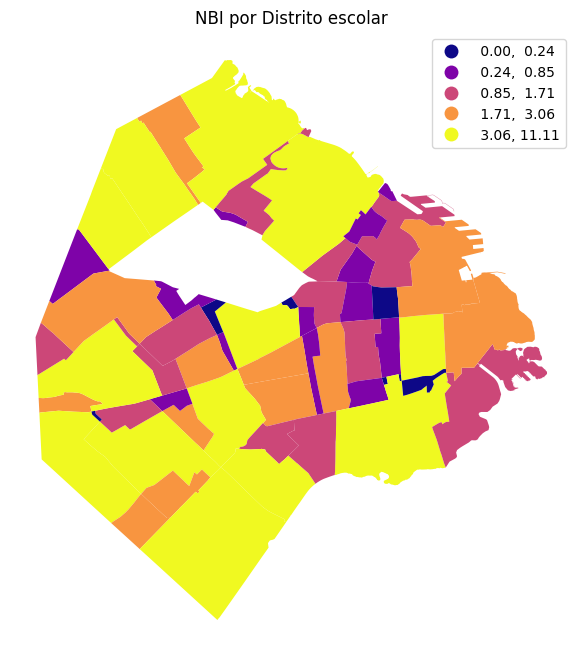

In [27]:
# Vamos a visualizar
f, ax = plt.subplots(1, figsize=(8, 8))
unidas.plot(
    ax=ax, column="valor_ponderado", legend=True, scheme="Quantiles", k=5, cmap="plasma"
)
ax.set_axis_off()
ax.set_title("NBI por Distrito escolar")


# Analizando poblacion que vive cerca de una estacion de subte

Vamos a realizar un caso de overlay tradicional mediante un join espacial utilizando la función de GeoPandas sjoin(). El caso tradicional de uso es cuando queremos transferir información de una serie de objetos referenciados en el espacio a otros, utilizando como criterio su relación en el espacio.

In [28]:
# cargamos nuestros shapes y proyectamos en la misma crs
carto = gpd.read_file(DATA_PATH / "census/informacion_censal_por_radio_2010.shp")
carto = carto.to_crs(epsg=5347)

estaciones = gpd.read_file(DATA_PATH / "subte/estaciones_de_subte.shp")
estaciones = estaciones.to_crs(epsg=5347)

In [29]:
# transformamos nuestro shape de estaciones de puntos en poligonos, de 500m a la redonda,
# considerando eso como el area de influencia de la estacion
estaciones_b = estaciones.copy()
estaciones_b.geometry = estaciones_b.buffer(500)

<Axes: >

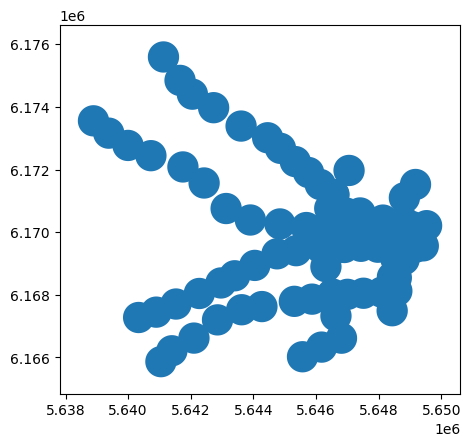

In [30]:
estaciones_b.plot()

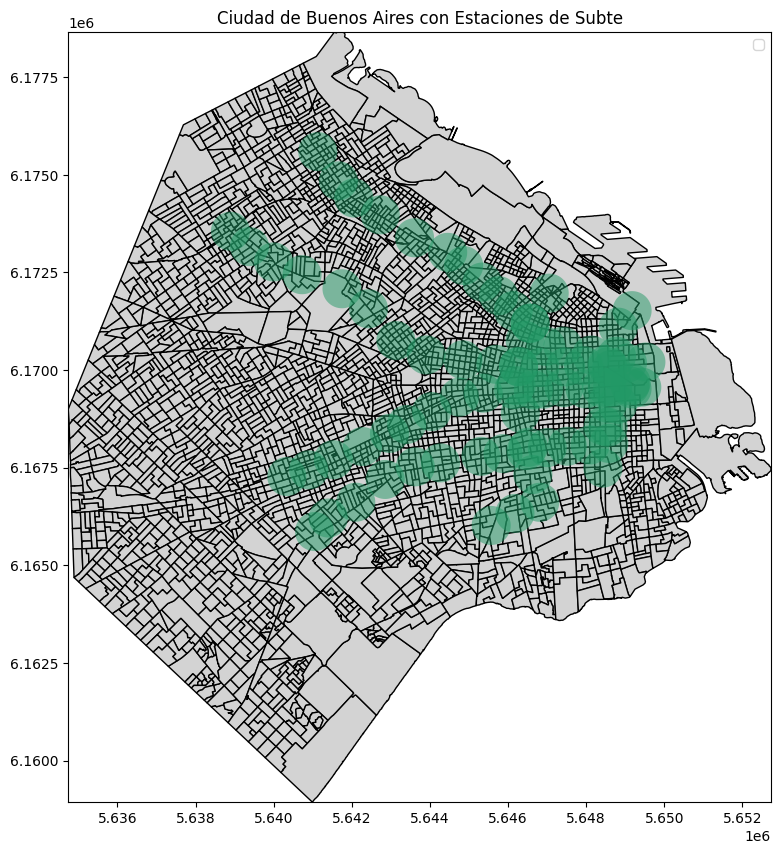

In [31]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar la capa de la ciudad de Buenos Aires
carto.plot(ax=ax, color="lightgrey", edgecolor="black")

# Dibujar la capa de las estaciones de subte
estaciones_b.plot(
    ax=ax, color="#229966", markersize=10, label="Estaciones de Subte", alpha=0.5
)

# Ajustar los límites del gráfico para asegurarse de que ambas capas sean visibles
xmin, ymin, xmax, ymax = carto.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Agregar título y leyenda
ax.set_title("Ciudad de Buenos Aires con Estaciones de Subte")
ax.legend()

# Mostrar el gráfico
plt.show()

In [32]:
# realizamos un join espacial, manteniendo todos los radios y obteniendo solo la informacion de los
# radios CONTENIDOS en dicha area de influencia
left_within = gpd.sjoin(carto, estaciones_b, how="left", op="within")
left_within.ESTACION = left_within.ESTACION.fillna("Ninguna")
left_within.head()
left_within = left_within.dropna()

<Axes: >

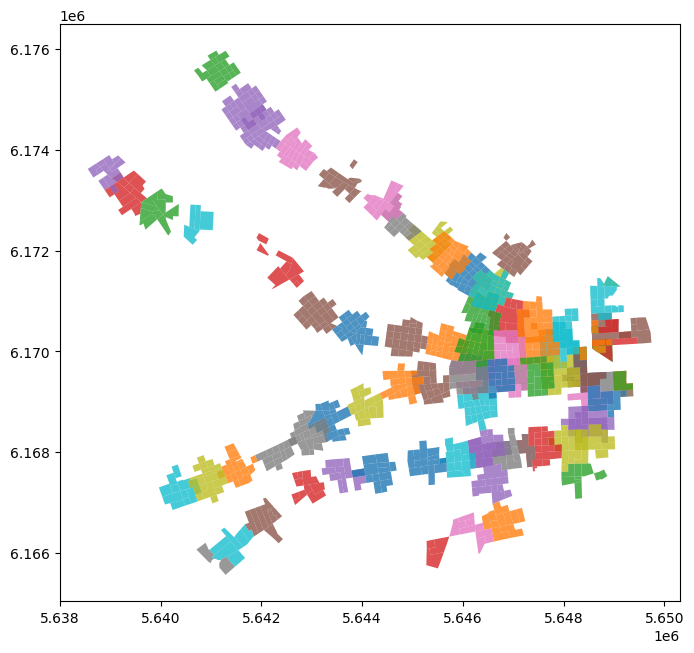

In [33]:
# ploteamos los resultados
f, ax = plt.subplots(1, figsize=(8, 8))
left_within.plot(ax=ax, column="ESTACION", alpha=0.8)

<Axes: >

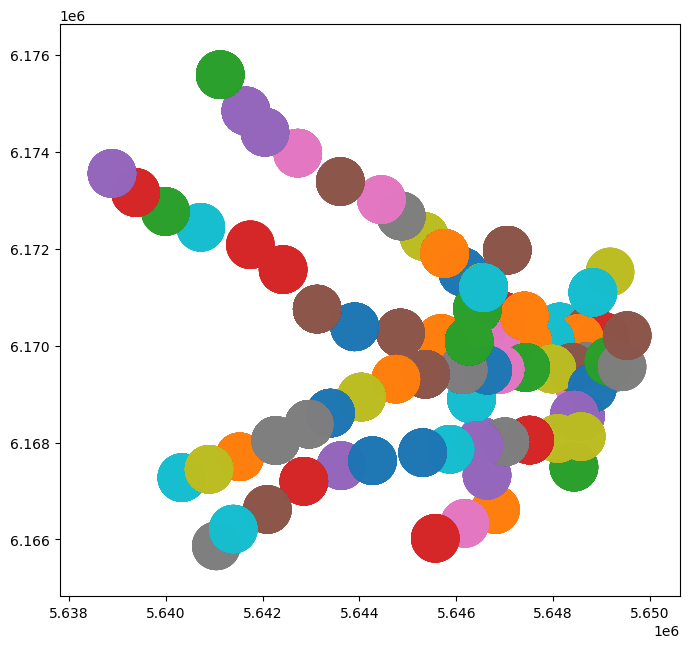

In [34]:
# realizmamos lo opuesto, manteniendo todas las estaciones y
right_intersects = gpd.sjoin(carto, estaciones_b, how="right", op="intersects")
right_intersects.ESTACION = right_intersects.ESTACION.fillna("Ninguna")

f, ax = plt.subplots(1, figsize=(8, 8))
right_intersects.plot(ax=ax, column="ESTACION", alpha=0.4)

In [35]:
# finalmente usamos la opcion por defecto, donde solo se mantienen los darios que intersectan
# con algun area de influencia estacion
radios_est = gpd.sjoin(carto, estaciones_b, how="inner", op="intersects")


<Axes: >

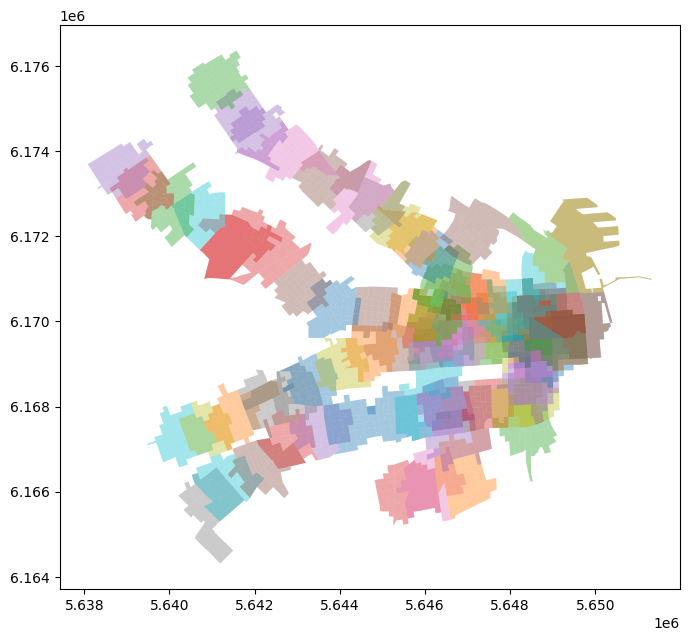

In [36]:
f, ax = plt.subplots(1, figsize=(8, 8))
radios_est.plot(ax=ax, column="ESTACION", alpha=0.4)

El inconveniente con este abordaje, es que un radio puede estar dentro del área de influencia de mas de una estación. Por ejemplo los radios del nudo del Obelisco

In [37]:
#chequeamos cuantos radios estan duplicados
radios_est.RADIO_I.duplicated().sum()

1659

In [38]:
# veamos un ejemplo
radios_est.loc[radios_est.RADIO_I == "1_12_1", ["RADIO_I", "ESTACION", "LINEA"]]

,RADIO_I,ESTACION,LINEA
1,1_12_1,SAENZ PEÑA,A
1,1_12_1,LIMA,A
1,1_12_1,DIAGONAL NORTE,C
1,1_12_1,9 DE JULIO,D
1,1_12_1,URUGUAY,B
1,1_12_1,C. PELLEGRINI,B
1,1_12_1,TRIBUNALES - TEATRO COLÓN,D


# <font color="darkmagenta">Regresión lineal Simple</font>

Dentro de los supervisados se encuentra la regresión lineal, que es una herramienta útil para predecir una respuesta cuantitativa.

Existen muchos algoritmos posteriores que pueden ser vistos como una generalización o una extensión de las regresiones lineales, por ello es importante tener un conocimiento real de este algoritmo, aunque pueda parecer simple.

En sentido amplio lo que hace una regresión lineal es obtener la relación entre unas variables independientes (X) y una variable dependiente (Y). Es decir, teniendo una serie de variables predictoras obtiene la relación con una variable cuantitativa a predecir. La regresión lineal explica la variable Y con las variables X, y obtiene la función lineal que mejor se ajusta o explica esta relación.

Cuando hay una sola variable predictora decimos que es una regresión lineal simple.

Cuando hay más de una variable predictora decimos que la regresión es múltiple.

Es decir, Y es función lineal de X, más un término de error. La parte
es el modelo de regresión lineal, siendo y los coeficientes de la regresión lineal y

el error cometido por el modelo.

Estos dos coeficientes son dos constantes que se obtienen por medio de lo que se denomina «entrenamiento» del modelo de regresión. Este entrenamiento se realiza con datos de los que sabemos valores reales de la tupla (X,y)

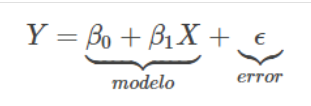

Una vez obtenida la estimación de estos dos coeficientes se puede predecir la variable Y usando X conocidos y a partir de la siguiente fórmula:

El método empleado con más frecuencia es el ajuste por mínimos cuadrados ordinarios (OLS), que identifica como mejor modelo la recta (o plano si es regresión múltiple) que minimiza la suma de las desviaciones verticales entre cada dato de entrenamiento y la recta, elevadas al cuadrado.


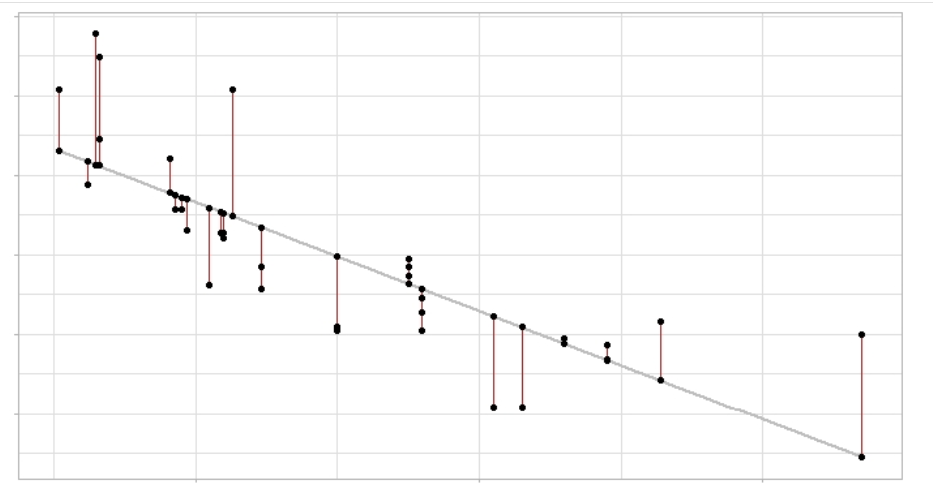

## <font color="#225577">Ejemplo 1 de regresión lineal simple</font>

Los datos a usar en este tutorial corresponden a la medición de la presión sanguínea sistólica (medida en mm de Mercurio) para 29 sujetos de diferentes edades.

En este set de datos la variable independiente (x) corresponde a la edad de cada sujeto, mientras que la variable dependiente (y) es precisamente la presión sanguínea.

A continuación leemos y visualizamos los datos.


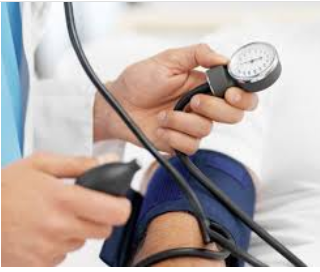

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

pres = pd.read_csv(DATA_PATH / "health/presion.csv", sep=";")
pres


,Edad,Pres_sist
0,39,144
1,45,138
2,47,145
3,65,162
4,46,142
5,67,170
6,42,124
7,67,158
8,56,154
9,64,162


La figura de abajo muestra la relación entre estas dos variables, evidenciando que los datos tienen un comportamiento lineal. Sin embargo podemos testear estadísticamente si las variables están o no asociadas linealmente.

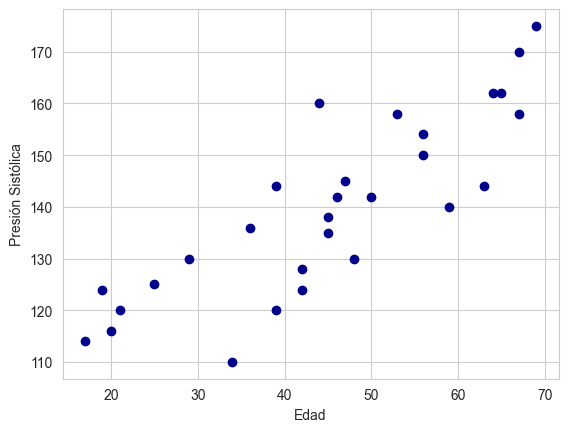

In [40]:
import seaborn as sns

# Establecer el estilo y el esquema de colores
sns.set_style("whitegrid")  # Establecer el estilo del fondo

plt.scatter(pres["Edad"], pres["Pres_sist"], color="darkblue")
plt.xlabel("Edad")
plt.ylabel("Presión Sistólica")

plt.show()

In [41]:
# Testeamos la correlación lineal entre las dos variables

corr_test = pearsonr(x=pres["Edad"], y=pres["Pres_sist"])
p_valor = corr_test[1]

# Formateamos  el p-valor en notación científica con 5 decimales
p_valor_formatted = "{:.5e}".format(p_valor)

# Guardamos el valor de la correlación estimada
coef_corr = corr_test[0].round(3)

print("Coeficiente de correlación de Pearson: ", coef_corr.round(3))
print("P-value: ", p_valor_formatted)

Coeficiente de correlación de Pearson:  0.844
P-value:  8.87628e-09


<font color="#5588AA">**Dado que las variables están correlacionadas, tiene sentido ajustar una recta de regresión para explicar la relación entre las mismas.**</font >

In [42]:
presx = pres["Edad"].values.reshape(
    -1, 1
)  # Necesario para que sklearn pueda trabajar con los datos
y = pres["Pres_sist"].values

# Crear el modelo de regresión lineal
modeloLS = LinearRegression()

# Ajustar el modelo a los datos
modeloLS.fit(presx, y)

# Predecir los valores de presión sistólica basados en la edad
y_pred = modeloLS.predict(presx)

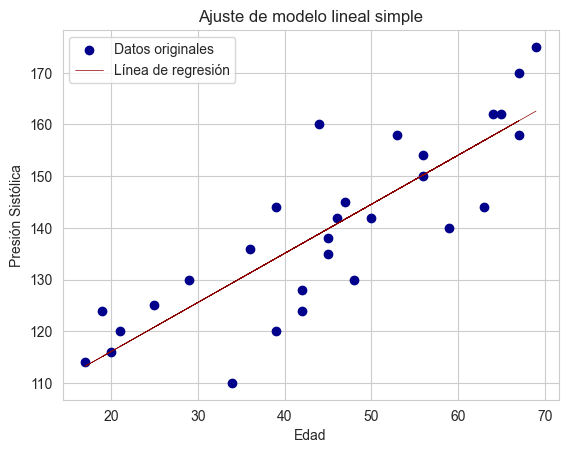

In [43]:
# Visualicemos  los datos originales y la línea de regresión
plt.scatter(presx, y, color="darkblue", label="Datos originales")
plt.plot(presx, y_pred, color="darkred", linewidth=0.5, label="Línea de regresión")
plt.xlabel("Edad")
plt.ylabel("Presión Sistólica")
plt.title("Ajuste de modelo lineal simple")
plt.legend()
plt.show()

<font color="#224411">**Pero, ¿cuáles son los coeficientes estimados de esta regresión?**</font>

In [44]:
# Coeficientes de la regresión
pendiente = modeloLS.coef_

pendiente.round(3)

array([0.949])

In [45]:
ordenada_origen = modeloLS.intercept_
ordenada_origen.round(3)

97.077

In [46]:
print(
    "La ecuación de la recta ajustada es y^=",
    ordenada_origen.round(3),
    "+",
    pendiente.round(3),
    "x",
)

La ecuación de la recta ajustada es y^= 97.077 + [0.949] x


Ahora que conocemos los coeficientes, agreguemos al gráfico la expresión de la recta de regresión ajustada.


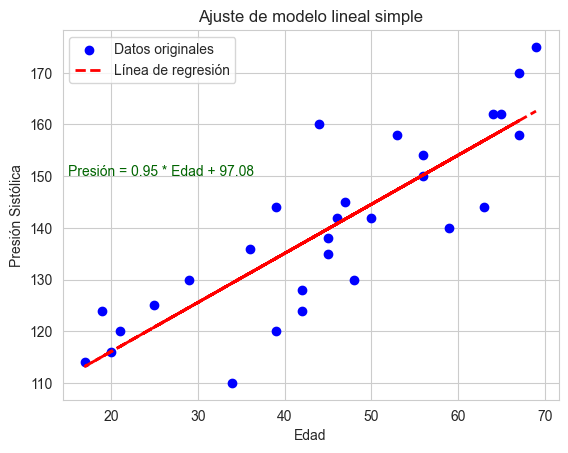

In [47]:
# Plotear los datos originales y la línea de regresión punteada
plt.scatter(presx, y, color="blue", label="Datos originales")
plt.plot(
    presx,
    y_pred,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="Línea de regresión",
)
plt.xlabel("Edad")
plt.ylabel("Presión Sistólica")
plt.title("Ajuste de modelo lineal simple")

# Superponer la ecuación estimada para la regresión
plt.text(
    15,
    150,
    f"Presión = {pendiente[0]:.2f} * Edad + {ordenada_origen:.2f}",
    color="darkgreen",
)

plt.legend()
plt.show()


## <font color="#775599">Error Estandar Residual (RSE)</font>

La calidad del ajuste de la regresión lineal típicamente es evaluada usando dos medidas: el **RSE** (error estándar de los residuos o residual standard error) y el estadístico R cuadrado.

El RSE es una estimación de la desviación estándar del error $\epsilon$.
En otras palabras, es la cantidad media que la respuesta se desviará de la recta real de regresión. Se obtiene con la siguiente fórmula:


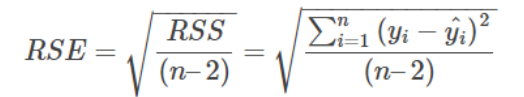


Su valor puede ser bueno o malo dependiendo del contexto ya que no es adimensional.

In [48]:
# Calculamos los residuos correspondientes al modelo ajustado
residuos = y - y_pred

# Calculanos el error estándar de los residuos (RSE)
rse = np.sqrt(np.sum(residuos**2) / (len(y) - 2))

print("Error estándar de los residuos (RSE): ", rse.round(3))


Error estándar de los residuos (RSE):  9.563


## <font color="#775599">Coeficiente de Determinación del Modelo</font>

El **$R^2$** o coeficiente de determinación, sin embargo toma valores entre 0 y 1, representa la proporción de la varianza explicada y es independiente de la escala de Y.

Para calcular el valor de **$R^2$** se usa la siguiente fórmula:


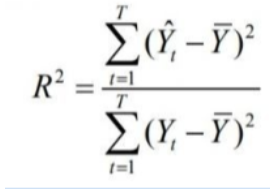


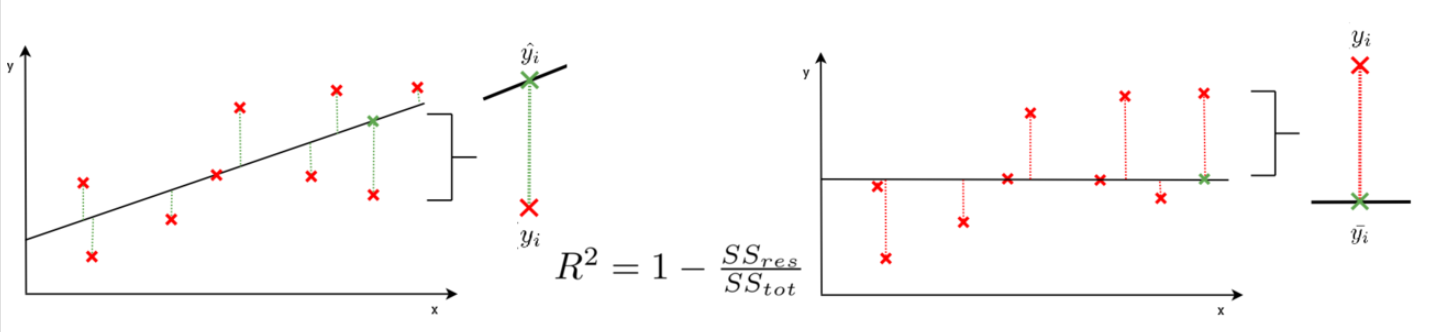

En esta gráfica se aprecian dos tipos de error, el que se comete estimando la Y con su promedio $\overline{Y}$

y el que se comete estimando la Y a partir de la recta de regresión.

El coeficiente de determinación **$R^2$** compara la suma de cuadrados de estos dos errores.

Si al usar la recta el error es mucho menor que sin usarla será cercano a 1 y esto indicará que la recta es una buena opción para estimar Y.

Si en cambio  **$R^2$** es cercano a 0, significa que la variable X no contribuye sustancialmente a la estimación de la Y.

In [49]:
modeloLS.score(presx, y)

0.71217886464055

In [50]:
# Calcular el coeficiente de determinación R^2
r_cuadrado = modeloLS.score(presx, y)
print(f"Coeficiente de determinación , R^2: {r_cuadrado:.4f}")

Coeficiente de determinación , R^2: 0.7122


## <font color="#225577">Ejemplo 2 de regresión lineal simple</font>

Supóngase que un analista de deportes quiere saber si existe una relación entre el número de veces que patean al arco los jugadores de un equipo de futbol y el número de goles que consigue el equipo. En caso de existir y de establecer un modelo, podría predecir el resultado del partido?
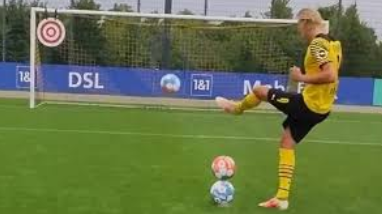

Vamos a clasificar ahora las bibliotecas en función de su utilidad

In [51]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import linregress
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



Configuramos los parámetros gráficos y alertas

In [52]:
# Configuración matplotlib
# ==============================================================================

style.use("ggplot") or plt.style.use("ggplot")

In [53]:
# Cargamos los datos

# Datos
# ==============================================================================
equipos = [
    "Indep",
    "Huracan",
    "Estudiantes",
    "River",
    "Boca",
    "Newls.",
    "Lanus",
    "SanLorenzo",
    "Peñarol",
    "Colocolo",
    "Racing",
    "Platense",
    "Chicago",
    "Fluminense",
    "Patronato",
    "Banfield",
    "Defensores",
    "ArgJun",
    "Ferro",
    "Gimnasia",
    "Talleres",
    "Tigre",
    "Velez",
    "Union",
    "SanMiguel",
    "Atlanta",
    "Instituto",
    "Quilmes",
    "Chacarita",
    "AllBoys",
]
patea = [
    5659,
    5710,
    5563,
    5672,
    5532,
    5600,
    5518,
    5447,
    5544,
    5598,
    5585,
    5436,
    5549,
    5612,
    5513,
    5579,
    5502,
    5509,
    5421,
    5559,
    5487,
    5508,
    5421,
    5452,
    5436,
    5528,
    5441,
    5486,
    5417,
    5421,
]

goles = [
    855,
    825,
    757,
    830,
    762,
    748,
    767,
    721,
    735,
    685,
    708,
    644,
    654,
    735,
    667,
    713,
    654,
    704,
    681,
    743,
    619,
    625,
    610,
    645,
    677,
    641,
    624,
    570,
    593,
    556,
]

futbol = pd.DataFrame({"equipos": equipos, "patea": patea, "goles": goles})
futbol.head(5)


,equipos,patea,goles
0,Indep,5659,855
1,Huracan,5710,825
2,Estudiantes,5563,757
3,River,5672,830
4,Boca,5532,762


Vamos a representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.


Text(0.5, 1.0, 'Distribución de patea y goles')

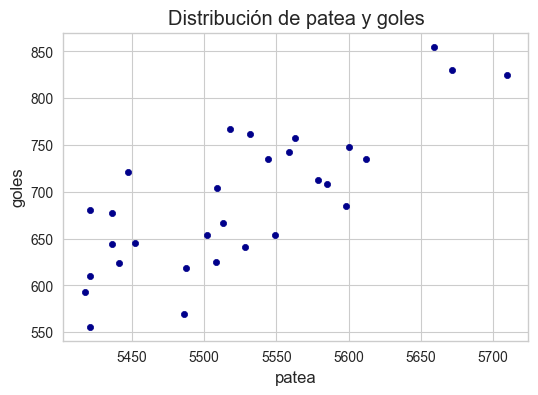

In [54]:
# Gráfico
# ==============================================================================
sns.set_style("whitegrid")  # Establecer el estilo del fondo

fig, ax = plt.subplots(figsize=(6, 4))

futbol.plot(x="patea", y="goles", c="darkblue", kind="scatter", ax=ax)
ax.set_title("Distribución de patea y goles")


Analizamos si las variables se correlacionan significativamente


In [55]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x=futbol["patea"], y=futbol["goles"])
print("Coeficiente de correlación de Pearson: ", corr_test[0].round(3))

# Formateamos  el p-valor en notación científica con 5 decimales
p_valor = corr_test[1]
p_valor_formatted = "{:.4e}".format(p_valor)

print("P-value: ", p_valor_formatted)

Coeficiente de correlación de Pearson:  0.784
P-value:  2.9517e-07


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.784) y significativa (p-value <<0.001). Tiene sentido intentar generar un modelo de regresión lineal


In [56]:
# Definimos la variable predictora y la variable respuesta
x = np.array(futbol["patea"])
y = np.array(futbol["goles"])
# Ajustar el modelo de regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Imprimir los resultados
print("Coeficiente de pendiente:", slope.round(3))
print("Término independiente:", intercept.round(3))
print("Coeficiente de correlación (R-value):", r_value.round(4))
print("Coeficiente de Determinación R2:", (r_value * r_value).round(4))
print("Valor p:", p_value.round(8))
print("Error estándar de la estimación:", std_err.round(4))
print("La recta ajustada es Y=", intercept.round(3), "+", slope.round(3), "X")

Coeficiente de pendiente: 0.739
Término independiente: -3392.819
Coeficiente de correlación (R-value): 0.7841
Coeficiente de Determinación R2: 0.6149
Valor p: 3e-07
Error estándar de la estimación: 0.1106
La recta ajustada es Y= -3392.819 + 0.739 X


<font color="#5533BB">Interpretemos la salida del modelo.</font> 

<font color="#BB2299">**¿Te parece que es un buen modelo?**</font>

# <font color="#225599">Ejercicio 2</font>

La base diabetes de la biblioteca sklearn es un conjunto de datos de diagnóstico de diabetes de pacientes. Contiene un total de 442 muestras y 10 características, donde cada característica representa un aspecto médico relevante. La respuesta es una medida cuantitativa de la progresión de la enfermedad un año después del inicio del estudio.

La lista de características en la base de datos de diabetes es:

   - Age (Edad)

  -  Sex (Sexo)

  -  Body mass index (BMI) (Índice de masa corporal)
    
  -  Average blood pressure (Presión arterial promedio)
    
  -  S1 (tc, total serum cholesterol)
    
  -  S2 ( ldl, low-density lipoprotein)
    
  -  S3 ( hdl, high-density lipoproteins)
    
  -  S4 ( tch, total cholesterol / HDL)
    
  -  S5 (log of serum triglycerides level)
    
  -  S6 ( glu, blood sugar level)

La variable de respuesta, que es la medida cuantitativa de la progresión de la enfermedad después de un año, está representada por el array diabetes_y. La característica seleccionada es la tercera columna (índice 2) de la base de datos de diabetes, que es una característica específica relacionada con el diagnóstico de diabetes.

a) Hallar la pendiente de la recta de regresión de mínimos cuadrados.

b) Hallar la ordenada al origen de la recta de regresión de mínimos cuadrados.

c) Hallar la proporción de variabilidad explicada por la recta de regresión.

d) Hallar el error rmse.

e) Comentar si te parece adecuado un modelo lineal simple para estos datos.



In [57]:
from sklearn.datasets import load_diabetes

# Cargar los datos de la base diabetes
diabetes_data = load_diabetes()

# Obtener las características (atributos predictores) y la variable de respuesta
X = diabetes_data.data  # Características
y = diabetes_data.target  # Variable de respuesta

# Regresión Lineal Múltiple

Un modelo de regresión lineal múltiple es un modelo estadístico versátil para evaluar las relaciones entre un destino continuo y los predictores.
El modelo es lineal porque consiste en términos de aditivos en los que cada término es un predictor que se multiplica por un coeficiente constante. El término independiente también se añade normalmente al modelo.
Los modelos lineales múltiples siguen la siguiente ecuación: 

$$E(Y_i)=(\beta_0+\beta_1X_{1i}+\beta_2X_{2i}+⋯+\beta_nX_{ni})+\epsilon_i$$



$\beta_0$: es la ordenada en el origen, el valor esperado de la variable dependiente Y cuando todos los predictores son cero.

$\beta_i$: es el efecto promedio que tiene el incremento en una unidad de la variable predictora $X_i$ sobre la variable dependiente Y, manteniéndose constantes el resto de variables. Se conocen como coeficientes parciales de regresión.

$\epsilon_i$: es el error, la diferencia entre el i-simo valor observado y el i-simo valor real.
Los valores de los 𝛽′𝑠
siempre son desconocidos y se estiman.


$$\widehat{Y}_i=\widehat{\beta}_0+\widehat{\beta}_1X_{1i}+...+\widehat{\beta}_mX_{mi}$$

Donde $^$ indica valor estimado y $e_i$ son los residuos, diferencias entre observados y estimados.

Es importante tener en cuenta que la magnitud de cada coeficiente parcial de regresión depende de las unidades en las que se mida la variable predictora a la que corresponde, por lo que su magnitud no está asociada con la importancia de cada predictor.


## <font color="#225566">Supuestos del modelo lineal</font>

<font color="#225566">**Distribución normal de los residuos:**</font>

Los residuos se deben distribuir de forma normal con media cero. Para comprobarlo se recurre a histogramas, a los cuantiles normales o a test de hipótesis de normalidad.


"**Variabilidad constante de los residuos (homocedasticidad):** 

La varianza de los residuos debe de ser constante en todo el rango de observaciones. Para comprobarlo se representan los residuos. Si la varianza es constante, se distribuyen de forma aleatoria manteniendo una misma dispersión y sin ningún patrón específico. Una distribución cónica es un claro identificador de falta de homocedasticidad. También se puede recurrir a contrastes de homocedasticidad como el test de Breusch-Pagan.\n\n\n"}]

<font color="#225566">**No autocorrelación (Independencia):**</font>

Los valores de cada observación son independientes de los otros, esto es especialmente importante de comprobar cuando se trabaja con mediciones temporales. Se recomienda representar los residuos ordenados acorde al tiempo de registro de las observaciones, si existe un cierto patrón hay indicios de autocorrelación. También se puede emplear el test de hipótesis de Durbin-Watson.


<font color="#225566">**Relación lineal entre los predictores numéricos y la variable respuesta**</font>

Cada predictor numérico tiene que estar linealmente relacionado con la variable respuesta Y
 mientras los demás predictores se mantienen constantes, de lo contrario no se puede introducir en el modelo. La forma más recomendable de comprobarlo es representando los residuos del modelo frente a cada uno de los predictores. Si la relación es lineal, los residuos se distribuyen de forma aleatoria entorno a cero. Estos análisis son solo aproximados, ya que no hay forma de saber si realmente la relación es lineal cuando el resto de predictores se mantienen constantes.

<font color="#225566">**Parsimonia:**</font>

Este término hace referencia a que el mejor modelo es aquel capaz de explicar con mayor precisión la variabilidad observada en la variable respuesta empleando el menor número de predictores, por lo tanto, con menos asunciones.

## <font color="#224488">Ejemplo 1 de Regresión Lineal Múltiple</font>

La base de datos s**tate.x77** es un conjunto de datosque contiene información socioeconómica y de salud para los 50 estados de Estados Unidos en el año 1977. Estos datos se utilizan comúnmente en análisis estadísticos y en la enseñanza de conceptos de regresión y estadística.

A continuación, se proporciona una descripción de las variables incluidas en esta base de datos:

   **Population**: Población en miles de habitantes.
   
   **Income**: Ingreso per cápita en dólares.
   
   **Illiteracy**: Tasa de analfabetismo, en porcentaje.
   
   **Life Exp**: Expectativa de vida, en años.
   
   **Murder**: Tasa de homicidios por cada 100,000 habitantes.
   
   **HS Grad**: Porcentaje de adultos con educación secundaria.
   
   **Frost**: Número de días con temperaturas bajo cero.
   
   **Area**: Área terrestre del estado en millas cuadradas.
   
   **State**: Nombre del estado.

Estos datos pueden ser utilizados para explorar relaciones entre variables socioeconómicas y de salud, así como para realizar análisis de regresión para predecir variables como la expectativa de vida o el ingreso per cápita en función de otras variables disponibles.

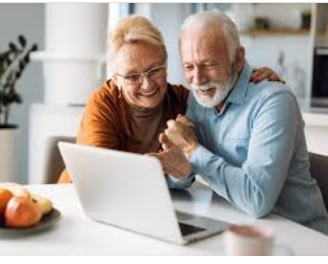


In [58]:
# Librerías
# ==============================================================================
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse


In [59]:
# Descarga de datos
# ==============================================================================
url = (
    "https://raw.githubusercontent.com/JoaquinAmatRodrigo/"
    "Estadistica-machine-learning-python/master/data/state_x77.csv"
)
datos = pd.read_csv(url, sep=",")
display(datos.info())
datos.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   habitantes      50 non-null     int64  
 1   ingresos        50 non-null     int64  
 2   analfabetismo   50 non-null     float64
 3   esp_vida        50 non-null     float64
 4   asesinatos      50 non-null     float64
 5   universitarios  50 non-null     float64
 6   heladas         50 non-null     int64  
 7   area            50 non-null     int64  
 8   densidad_pobl   50 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 3.6 KB


None

,habitantes,ingresos,analfabetismo,esp_vida,asesinatos,universitarios,heladas,area,densidad_pobl
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,71.290526
1,365,6315,1.5,69.31,11.3,66.7,152,566432,0.644384
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,19.503249


In [60]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns="esp_vida")
y = datos["esp_vida"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.reshape(-1, 1), train_size=0.8, random_state=1234, shuffle=True
)


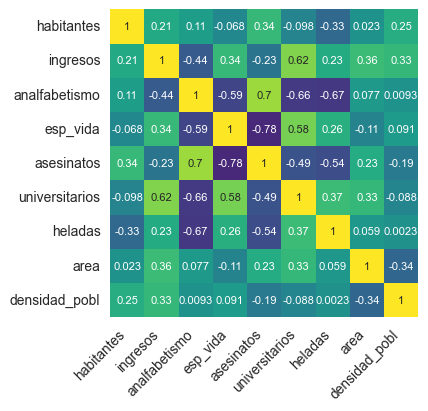

In [61]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

# Definimos la matriz de correlación

corr_matrix = datos.corr(method="pearson")
sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=False,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap="viridis",
    square=True,
    ax=ax,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment="right",
)
ax.tick_params(labelsize=10)

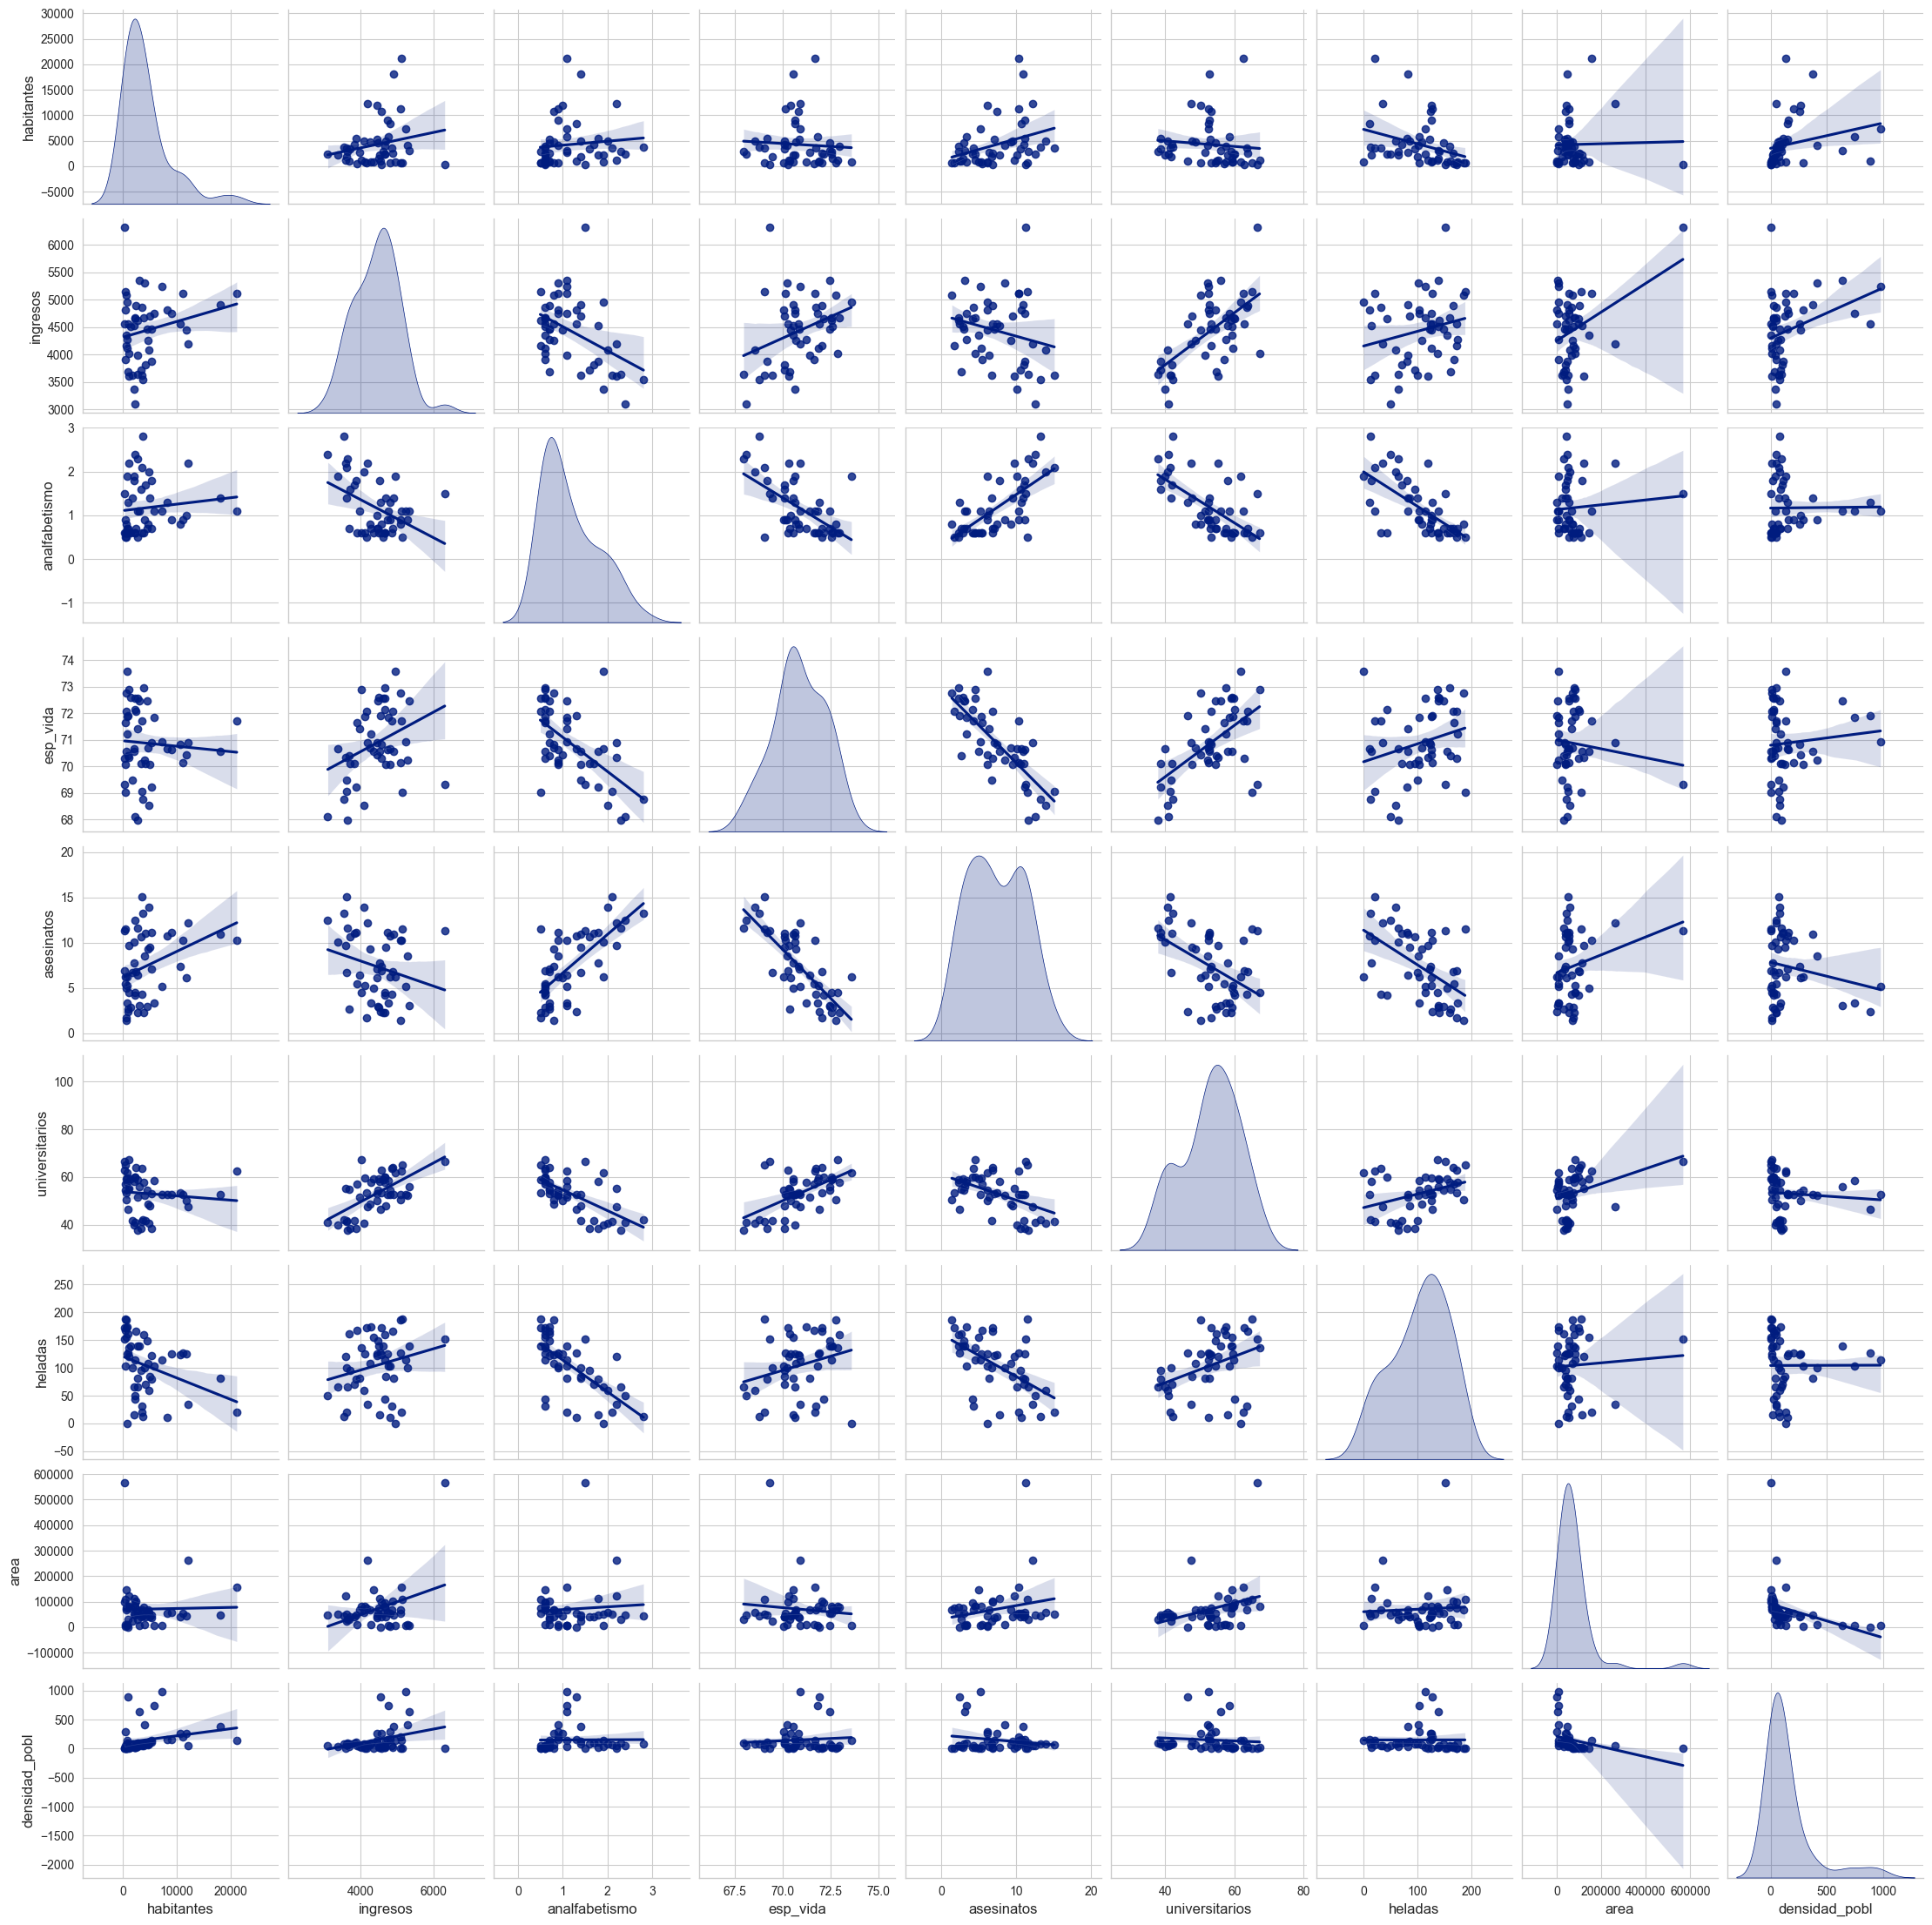

In [62]:
# Crear el gráfico de pares

sns.set_palette("dark", n_colors=9, desat=None, color_codes=False)

sns.pairplot(datos, kind="reg", diag_kind="kde", palette="husl")

# Mostrar el gráfico
plt.show()


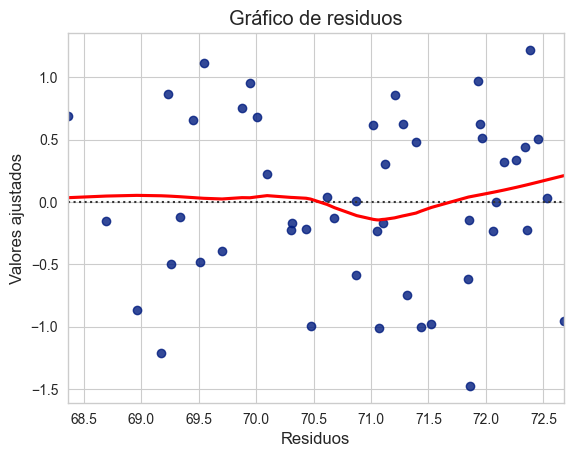

In [63]:
from sklearn.linear_model import LinearRegression

# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Calcular los residuos
residuos = y - modelo.predict(X)
prediccion = modelo.predict(X)
# Graficar los residuos
sns.residplot(x=modelo.predict(X), y=residuos, lowess=True, line_kws={"color": "red"})
plt.xlabel("Residuos")
plt.ylabel("Valores ajustados")
plt.title("Gráfico de residuos")
plt.show()

Text(0.5, 0.98, 'Diagnóstico residuos')

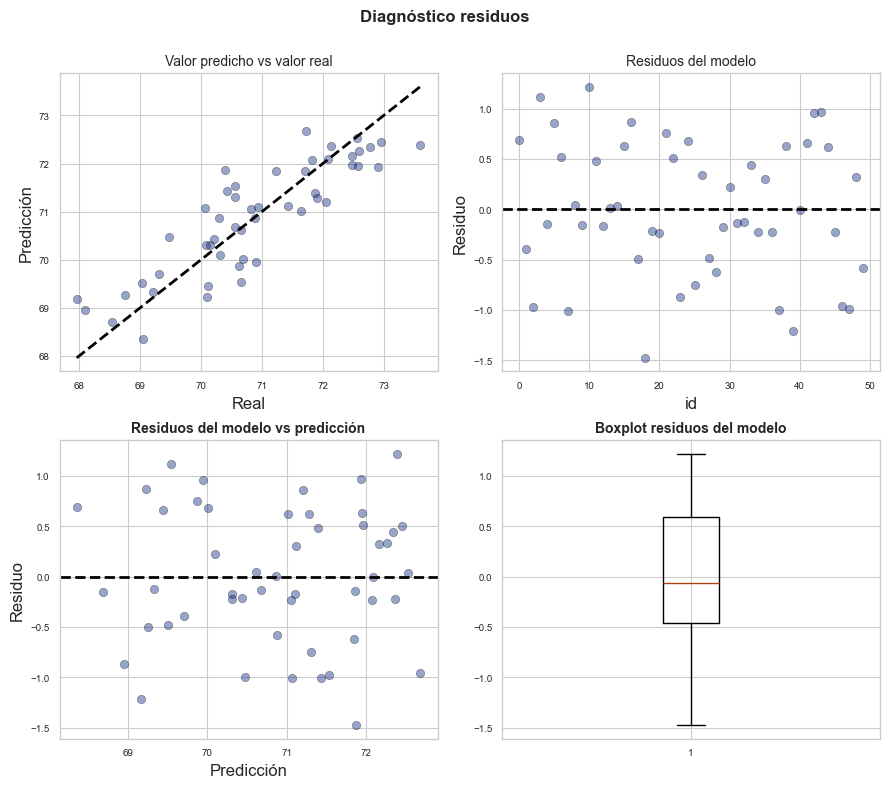

In [64]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y, prediccion, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 0].plot([y.min(), y_train.max()], [y.min(), y.max()], "k--", lw=2)
axes[0, 0].set_title("Valor predicho vs valor real", fontsize=10)
axes[0, 0].set_xlabel("Real")
axes[0, 0].set_ylabel("Predicción")
axes[0, 0].tick_params(labelsize=7)

axes[0, 1].scatter(list(range(len(y))), residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle="--", color="black", lw=2)
axes[0, 1].set_title("Residuos del modelo", fontsize=10)
axes[0, 1].set_xlabel("id")
axes[0, 1].set_ylabel("Residuo")
axes[0, 1].tick_params(labelsize=7)


axes[1, 0].set_title("Distribución residuos del modelo", fontsize=10, fontweight="bold")
axes[1, 0].scatter(prediccion, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[1, 0].axhline(y=0, linestyle="--", color="black", lw=2)
axes[1, 0].set_title(
    "Residuos del modelo vs predicción", fontsize=10, fontweight="bold"
)
axes[1, 0].set_xlabel("Predicción")
axes[1, 0].set_ylabel("Residuo")
axes[1, 0].tick_params(labelsize=7)

axes[1, 1].set_title("Boxplot residuos del modelo", fontsize=10, fontweight="bold")
axes[1, 1].tick_params(labelsize=7)
axes[1, 1].boxplot(x=residuos)


# Se eliminan los axes vacíos
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Diagnóstico residuos", fontsize=12, fontweight="bold")


In [65]:
import statsmodels.api as sm

# Agregar una columna de unos para el término independiente
X_train = sm.add_constant(X_train, prepend=True).rename(columns={"const": "intercept"})

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo_res = modelo.fit()

# Imprimir el resumen del modelo
print(modelo_res.summary())

# Calcular los intervalos de confianza para los coeficientes del modelo
intervalos_confianza = modelo_res.conf_int()
print("Intervalos de Confianza para los Coeficientes:")
print(intervalos_confianza)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     12.28
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.02e-07
Time:                        20:08:45   Log-Likelihood:                -42.442
No. Observations:                  40   AIC:                             102.9
Df Residuals:                      31   BIC:                             118.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         70.3069      2.171     32.